# Powerproduction model

<br>

## Read and overall view of the dataset

****

In [4]:
#import pandas and read powerproduction dataset
import pandas as pd
path = ("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")## 
df = pd.read_csv (path)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


Display pairplot to see the overall aspect of each of the variables:

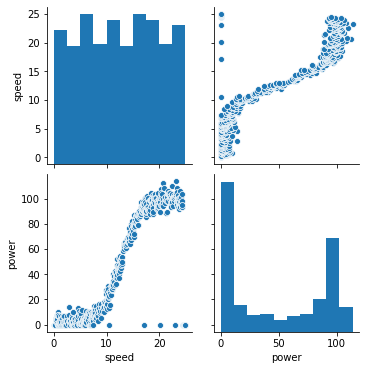

In [5]:
import seaborn as sns
sns.pairplot(df)

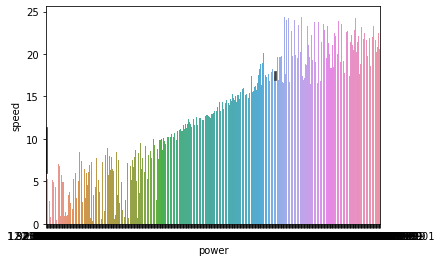

In [6]:
sns.barplot(x="power",y="speed", data=df).set_title('Distribution of speed values ')

Text(0.5, 1.0, 'Distribution of probability of power values')

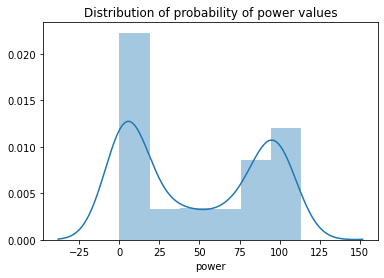

In [11]:
sns.distplot(df['power']).set_title('Distribution of probability of power values')

Text(0.5, 1.0, 'Distribution of probability of speed values')

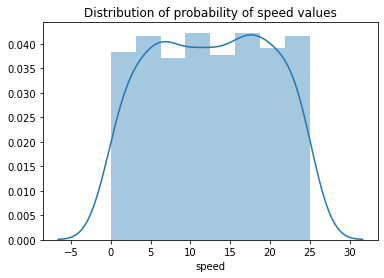

In [12]:
sns.distplot(df['speed']).set_title('Distribution of probability of speed values')

## Simple linear regression

In [ ]:
import matplotlib.pyplot as plt

